In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts
import pickle
import matplotlib.pyplot as pyplot

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df=df.fillna(df.median())

In [9]:
x=df.drop(["Outcome"],axis=1)

In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
y=df["Outcome"]

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25)

In [8]:
x_train.shape

(576, 8)

In [9]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
model= Sequential()

In [11]:
model.add(Dense(512, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

C:\Users\swaru\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,730 (702.07 KB)

 Trainable params: 179,730 (702.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,epochs=500,batch_size=16,validation_data=(x_test,y_test))

Epoch 1/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5731 - loss: 1.2813 - val_accuracy: 0.6927 - val_loss: 0.8860
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.8778 - val_accuracy: 0.6719 - val_loss: 0.7814
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.6521 - val_accuracy: 0.7031 - val_loss: 0.6064
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 0.5906 - val_accuracy: 0.7135 - val_loss: 0.5865
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5959 - val_accuracy: 0.6927 - val_loss: 0.5915
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5651 - val_accuracy: 0.6771 - val_loss: 0.6069
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.5814 - val_accuracy: 0.6823 - val_loss: 0.5682
Epoch 8/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5945 - val_accuracy: 0.6927 - v

In [12]:
predict=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [13]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
132,3,170,64,37,225,34.5,0.356,30
5,5,116,74,0,0,25.6,0.201,30
61,8,133,72,0,0,32.9,0.270,39
304,3,150,76,0,0,21.0,0.207,37
91,4,123,80,15,176,32.0,0.443,34
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
330,8,118,72,19,0,23.1,1.476,46
695,7,142,90,24,480,30.4,0.128,43
545,8,186,90,35,225,34.5,0.423,37


In [31]:
test1=model.predict(np.array([[1,60,60,0,0,30.1,0.152,45]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [34]:
test1

array([[9.9996984e-01, 3.0180248e-05]], dtype=float32)

In [32]:
np.argmax(test1)

0

In [16]:
prediction=np.argmax(predict,axis=1)

In [17]:
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [18]:
model.evaluate(x_train,y_train)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9147 - loss: 0.2641  


[0.24366495013237, 0.9149305820465088]

In [19]:
model.evaluate(x_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 1.3938 


[1.872805118560791, 0.6614583134651184]

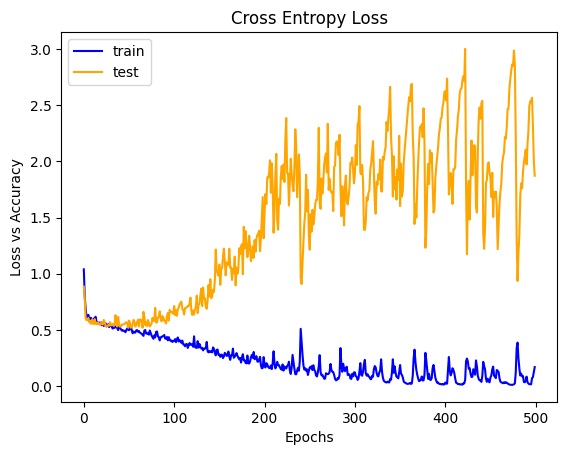

In [20]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss vs Accuracy')
print("\n")
print("\n")

Text(0, 0.5, 'Loss vs Accuracy')

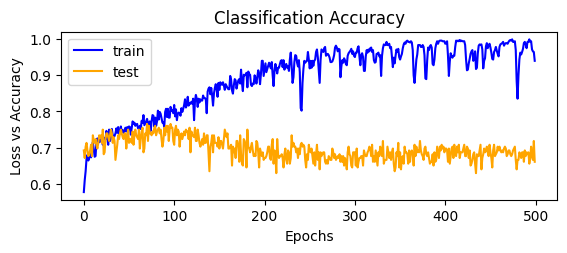

In [21]:
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss vs Accuracy')

In [33]:
model.save('diabetes_model.h5')